# Classification of dangerous asteroids

In [1]:
%load_ext autoreload
%autoreload 2

In [95]:
# Standard python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import loguniform, cosine
from scipy.stats import truncnorm

In [125]:
""" Generate the data """

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

def inputs_sampling():

    # Diameter (double check the lambda coefficients!)
    diameter = 1.326e6 *  np.power(10,-0.2 * np.random.uniform(20,30)) / np.sqrt(1e-8 + np.absolute(
        0.44 * np.random.normal(loc=0.034, scale=0.014) +
        1.21 * np.random.normal(loc=0.151, scale=0.122)
        ))

    # Density
    density = 1000 * (1 - np.random.normal(loc=0.34, scale=0.18)) * (
        0.349 * np.random.normal(loc=3.38, scale=0.19) +
        0.389 * np.random.normal(loc=3.30, scale=0.12) +
        0.093 * np.random.normal(loc=3.19, scale=0.14) +
        0.043 * np.random.normal(loc=2.27, scale=0.13) +
        0.025 * np.random.normal(loc=6.75, scale=1.84) +
        0.024 * np.random.normal(loc=7.15, scale=0.57) +
        0.034 * np.random.normal(loc=2.84, scale=0.13) +
        0.011 * np.random.normal(loc=3.12, scale=0.19) +
        0.034 * np.random.normal(loc=2.86, scale=0.11)
    )

    # # Density
    # density = 1000 * (1 - get_truncated_normal(mean=0.34, sd=0.18, low=0.01, upp=0.7).rvs()) * (
    #     0.349 * get_truncated_normal(mean=3.38, sd=0.19, low=1.25 , upp=8.5).rvs() +\
    #     0.389 * get_truncated_normal(mean=3.30, sd=0.12, low=1.25 , upp=8.5).rvs() +\
    #     0.093 * get_truncated_normal(mean=3.19, sd=0.14, low=1.25 , upp=8.5).rvs() +\
    #     0.043 * get_truncated_normal(mean=2.27, sd=0.13, low=1.25 , upp=8.5).rvs() +\
    #     0.025 * get_truncated_normal(mean=6.75, sd=1.84, low=1.25 , upp=8.5).rvs() +\
    #     0.024 * get_truncated_normal(mean=7.15, sd=0.57, low=1.25 , upp=8.5).rvs() +\
    #     0.034 * get_truncated_normal(mean=2.84, sd=0.13, low=1.25 , upp=8.5).rvs() +\
    #     0.011 * get_truncated_normal(mean=3.12, sd=0.19, low=1.25 , upp=8.5).rvs() +\
    #     0.034 * get_truncated_normal(mean=2.86, sd=0.11, low=1.25 , upp=8.5).rvs())

    # Strength
    strength = loguniform.rvs(1e5, 1e7)
    # Alpha
    alpha = np.random.uniform(0.1,0.3)
    # Velocity
    velocity = np.random.gamma(shape=1.5625, scale=1/5.2386) # Approximation, not correct
    # Angle 
    angle = 45 + cosine.rvs(scale=45/np.pi)
    # Azimuth
    azimuth = np.random.uniform(0,360)
    # LumEff
    lumeff = loguniform.rvs(3e-4, 3e-2)
    # Ablation coefficient
    ablation = loguniform.rvs(3.5e-10, 7e-8)

    return [diameter, density, strength, alpha, velocity, angle, azimuth, lumeff, ablation]


def generate_data(n_samples):
    input_samples = np.reshape(inputs_sampling(), (1,9))
    for i in range(n_samples):
        input_samples = np.concatenate((input_samples, np.reshape(inputs_sampling(), (1,9))), axis=0)
    
    diameters = input_samples[:,0]
    densities = input_samples[:,1]
    strengths = input_samples[:,2]
    alphas = input_samples[:,3]
    velocities = input_samples[:,4]
    angles = input_samples[:,5]
    azimuths = input_samples[:,6]
    lumeffs = input_samples[:,7]
    ablations = input_samples[:,8]

    return [diameters, densities, strengths, alphas, velocities, angles, azimuths, lumeffs, ablations]

In [172]:
""" Generate plots """

def generate_subplots(subplot_id, property_values, x_label, y_label, range=None):
    plt.subplot(3,3,subplot_id)
    plt.hist(property_values, bins=40, density=True, range=range, alpha=0.7, rwidth=0.8)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    return

def plot_inputs_distributions(properties_values):

    fig, axs = plt.subplots(3, 3, figsize=(15, 12))
    
    generate_subplots(1, properties_values[0], 'Diameter [m]', 'Normalized probability', range=(0,800))
    generate_subplots(2, properties_values[1], 'Density [t/m^3]', 'Normalized probability')
    generate_subplots(3, properties_values[2], 'Strength [MPa]', 'Normalized probability')
    generate_subplots(4, properties_values[3], 'Alpha [-]', 'Normalized probability')
    generate_subplots(5, properties_values[4], 'Velocity [km/s]', 'Normalized probability')
    generate_subplots(6, properties_values[5], 'Angle [degrees]', 'Normalized probability')
    generate_subplots(7, properties_values[6], 'Azimuth [degrees]', 'Normalized probability')
    generate_subplots(8, properties_values[7], 'Lumeff [m]', 'Normalized probability')
    generate_subplots(9, properties_values[8], 'Ablation [kg/J]', 'Normalized probability')
    plt.show()
    return

import matplotlib as mpl

def plot_individual_distributions(property_values, x_label, y_label, range=None, name='no_name'):


    fig, ax = plt.subplots(figsize=[8,6])

    fmt = lambda x, pos: '{:.2f}'.format((x), pos)

    plt.hist(property_values, bins=40, density=True, range=range, alpha=0.7, rwidth=0.8)
    plt.xlim(range)
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    # ax.set_yticks([0.00,0.01,0.02]) # only for diameter
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
    fig.savefig('./' + name + '.pdf', bbox_inches="tight")
    plt.show()
    return

In [138]:
# Data acquisition
properties_values = generate_data(100000)

In [ ]:
# Plot all properties
plot_inputs_distributions(properties_values)

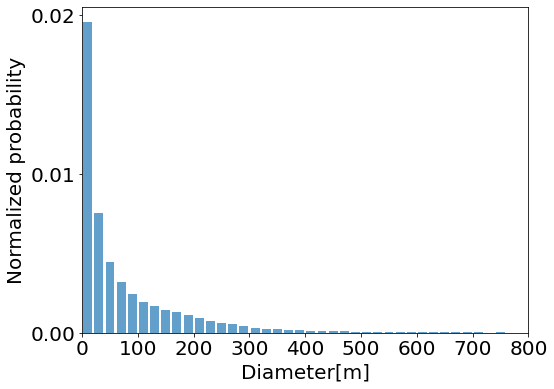

In [171]:
# Plot the diameters
plot_individual_distributions(properties_values[0], 'Diameter[m]', 'Normalized probability', range=(0,800), name='diam')

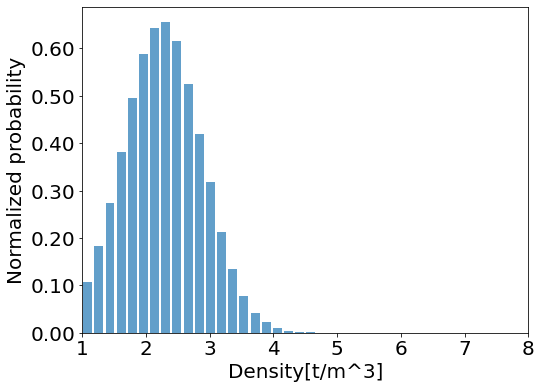

In [173]:
# Plot the density
plot_individual_distributions(0.001 * properties_values[1], 'Density[t/m^3]', 'Normalized probability', range=(1,8), name='dens')

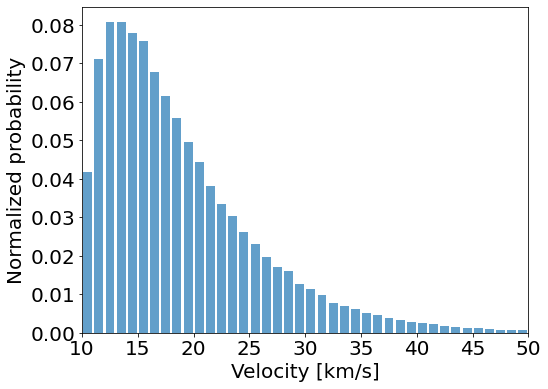

In [175]:
# Plot the density
plot_individual_distributions(10 + 30 * properties_values[4], 'Velocity [km/s]', 'Normalized probability', range=(10,50), name='vel')